In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
x = np.linspace(-1, 1, 50).reshape(-1, 1)

In [3]:
y = 5*x + 4 
noise = (np.abs(x.flatten())*np.random.randn(len(x))).reshape(-1,1)

In [4]:
y = y + noise
y.shape

(50, 1)

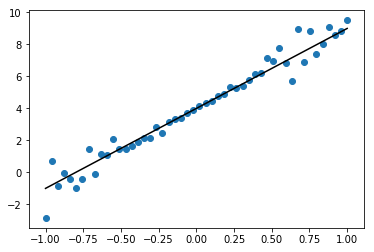

In [5]:
plt.scatter(x, y)
plt.plot(x, 5*x + 4, 'k')

### Prior

$P(\theta) \sim \mathcal{N}{(\mu, \Sigma)}$ 
where $\Sigma$ is the covariance matrix.

Let's keep $\mu = 0$

Thus, 
$P(\theta) \sim \mathcal{N}{(0, \Sigma)}$ 

Let's visualise a pdf for some known $\Sigma$ matrix.

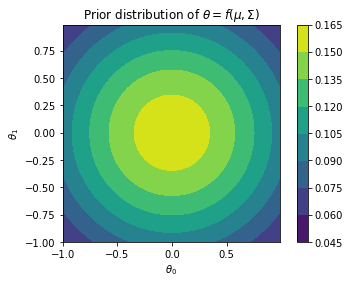

In [6]:
from scipy.stats import multivariate_normal
from matplotlib import cm
cov = np.array([[ 1 , 0], [0,  1]])
var = multivariate_normal(mean=[0,0], cov=cov)
x_grid, y_grid = np.mgrid[-1:1:.01, -1:1:.01]
pos = np.dstack((x_grid, y_grid))
z = var.pdf(pos)
plt.contourf(x_grid, y_grid, z, cmap=cm.viridis)
plt.gca().set_aspect('equal')
plt.xlabel(r"$\theta_0$")
plt.ylabel(r"$\theta_1$")
plt.title(r"Prior distribution of $\theta = f(\mu, \Sigma)$")
plt.colorbar()

### Likelihood

We have $y_i \sim \mathcal{N}{(x_i\theta, \sigma^2)}$

$P(D|\theta) = \prod_{i}\frac{1}{\sqrt{2\pi \sigma^2}}e^\frac{(y_i - x_i\theta)^2}{2\sigma^2}$

In [7]:
def likelihood(theta_0, theta_1, x, y, sigma):
    s = 0
    x_plus_1 = np.hstack((np.ones_like(x), x))

    for i in range(len(x)):
        y_i_hat = x_plus_1[i, :]@np.array([theta_0, theta_1])
        s += (y[i,:]-y_i_hat)**2
    
    
    return np.exp(-s/(2*sigma*sigma))
    
    

In [8]:
likelihood(-1, 1, x, y, 4)

array([2.38187232e-22])

In [9]:
sigma = 2

In [10]:
x_grid

array([[-1.  , -1.  , -1.  , ..., -1.  , -1.  , -1.  ],
       [-0.99, -0.99, -0.99, ..., -0.99, -0.99, -0.99],
       [-0.98, -0.98, -0.98, ..., -0.98, -0.98, -0.98],
       ...,
       [ 0.97,  0.97,  0.97, ...,  0.97,  0.97,  0.97],
       [ 0.98,  0.98,  0.98, ...,  0.98,  0.98,  0.98],
       [ 0.99,  0.99,  0.99, ...,  0.99,  0.99,  0.99]])

In [11]:
y_grid

array([[-1.  , -0.99, -0.98, ...,  0.97,  0.98,  0.99],
       [-1.  , -0.99, -0.98, ...,  0.97,  0.98,  0.99],
       [-1.  , -0.99, -0.98, ...,  0.97,  0.98,  0.99],
       ...,
       [-1.  , -0.99, -0.98, ...,  0.97,  0.98,  0.99],
       [-1.  , -0.99, -0.98, ...,  0.97,  0.98,  0.99],
       [-1.  , -0.99, -0.98, ...,  0.97,  0.98,  0.99]])

In [12]:
x_grid_2, y_grid_2 = np.mgrid[0:8:.1, 0:8:.1]

li = np.zeros_like(x_grid_2)
for i in range(x_grid_2.shape[0]):
    for j in range(x_grid_2.shape[1]):
        li[i, j] = likelihood(x_grid_2[i, j], y_grid_2[i, j], x, y, 4)
        

Text(0.5,1,'Likelihood as a function of ($\\theta_0, \\theta_1$)')

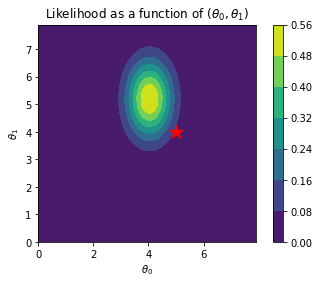

In [13]:
plt.contourf(x_grid_2, y_grid_2, li)
plt.gca().set_aspect('equal')
plt.xlabel(r"$\theta_0$")
plt.ylabel(r"$\theta_1$")
plt.colorbar()
plt.scatter(5, 4, s=200, marker='*', color='r')
plt.title(r"Likelihood as a function of ($\theta_0, \theta_1$)")

### Posterior

Posterior is proportional to likelihood times prior

$P(\theta|D) \propto P(D|\theta)P(\theta)$

In [14]:
np.linalg.inv(cov)

array([[1., 0.],
       [0., 1.]])

In [15]:
b = np.linalg.inv(cov)
a = 1/(sigma*sigma)

In [16]:
b

array([[1., 0.],
       [0., 1.]])

In [17]:
a

0.25

$\Lambda = aX^TX + bI $

$\mu = a\Lambda^{-1}X^Ty$


In [18]:
X = np.hstack((np.ones_like(x), x))

In [19]:
lam = a*X.T@X + b
lam

array([[ 1.35000000e+01, -7.77156117e-16],
       [-7.77156117e-16,  5.33673469e+00]])

In [20]:
mu = a*np.linalg.inv(lam)@X.T@y

In [21]:
mu

array([[3.73839524],
       [4.22384338]])

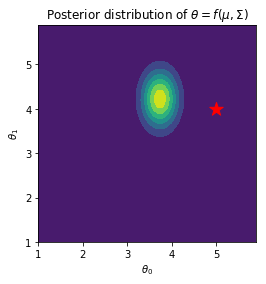

In [22]:
from scipy.stats import multivariate_normal
cov_post = np.linalg.inv(lam)
var = multivariate_normal(mean=mu.flatten(), cov=cov_post)
x_grid, y_grid = np.mgrid[1:6:.1, 1:6:.1]
pos = np.dstack((x_grid, y_grid))
z = var.pdf(pos)
plt.contourf(x_grid, y_grid, z, cmap=cm.viridis)
plt.gca().set_aspect('equal')
plt.xlabel(r"$\theta_0$")
plt.ylabel(r"$\theta_1$")
plt.title(r"Posterior distribution of $\theta = f(\mu, \Sigma)$")
plt.scatter(5, 4, s=200, marker='*', color='r')

### Predictive distribution

In [23]:
def mean_predictive(x):
    return mu.T@x

def c(x):
    z = 1/a + x.T@np.linalg.inv(lam)@x
    return z

In [24]:
mean_predictive(np.array([1, 0]))

array([3.73839524])

In [25]:
c(np.array([1, 0]))

4.074074074074074

In [26]:
for v in X:
    mean_predictive(v)

In [27]:
y_hat

array([7.96223863])

In [29]:
va = multivariate_normal(mean_predictive(v), c(v))


In [31]:
va.mean

array([7.96223863])

In [78]:
test_set = np.linspace(-20, 20, num=40)

In [82]:
x_point, np.array([1, x_point])

(-20.0, array([  1., -20.]))

In [83]:
pred_y_mean = np.zeros_like(test_set)
pred_y_sigma = np.zeros_like(test_set)
for i, x_point in enumerate(test_set):
    t = np.array([1, x_point])
    pred_y_mean[i] = mean_predictive(t)
    pred_y_sigma[i] = c(t)
pred_y_mean = pred_y_mean.flatten()
pred_y_sigma = pred_y_sigma.flatten()

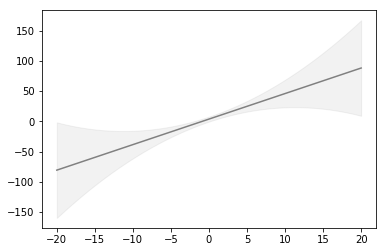

In [84]:
plt.plot(test_set, pred_y_mean, '-', color='gray')

plt.fill_between(test_set, pred_y_mean - pred_y_sigma, pred_y_mean + pred_y_sigma,
                 color='gray', alpha=0.1)

In [58]:
x.flatten(), y.flatten()

(array([-1.        , -0.95918367, -0.91836735, -0.87755102, -0.83673469,
        -0.79591837, -0.75510204, -0.71428571, -0.67346939, -0.63265306,
        -0.59183673, -0.55102041, -0.51020408, -0.46938776, -0.42857143,
        -0.3877551 , -0.34693878, -0.30612245, -0.26530612, -0.2244898 ,
        -0.18367347, -0.14285714, -0.10204082, -0.06122449, -0.02040816,
         0.02040816,  0.06122449,  0.10204082,  0.14285714,  0.18367347,
         0.2244898 ,  0.26530612,  0.30612245,  0.34693878,  0.3877551 ,
         0.42857143,  0.46938776,  0.51020408,  0.55102041,  0.59183673,
         0.63265306,  0.67346939,  0.71428571,  0.75510204,  0.79591837,
         0.83673469,  0.87755102,  0.91836735,  0.95918367,  1.        ]),
 array([-2.83218788,  0.73293817, -0.83048564, -0.0275728 , -0.4005707 ,
        -0.96084209, -0.39611937,  1.43707003, -0.11365   ,  1.12581674,
         1.08204869,  2.0859169 ,  1.45165433,  1.46998267,  1.67930032,
         1.89765088,  2.15380772,  2.12290406,  2

In [50]:
pred_y_mean

array([[-0.48544814],
       [-0.31304637],
       [-0.1406446 ],
       [ 0.03175717],
       [ 0.20415894],
       [ 0.37656071],
       [ 0.54896249],
       [ 0.72136426],
       [ 0.89376603],
       [ 1.0661678 ],
       [ 1.23856957],
       [ 1.41097134],
       [ 1.58337311],
       [ 1.75577488],
       [ 1.92817665],
       [ 2.10057842],
       [ 2.27298019],
       [ 2.44538196],
       [ 2.61778373],
       [ 2.7901855 ],
       [ 2.96258728],
       [ 3.13498905],
       [ 3.30739082],
       [ 3.47979259],
       [ 3.65219436],
       [ 3.82459613],
       [ 3.9969979 ],
       [ 4.16939967],
       [ 4.34180144],
       [ 4.51420321],
       [ 4.68660498],
       [ 4.85900675],
       [ 5.03140852],
       [ 5.2038103 ],
       [ 5.37621207],
       [ 5.54861384],
       [ 5.72101561],
       [ 5.89341738],
       [ 6.06581915],
       [ 6.23822092],
       [ 6.41062269],
       [ 6.58302446],
       [ 6.75542623],
       [ 6.927828  ],
       [ 7.10022977],
       [ 7

In [71]:
vari = np.array([1, ])

22.812123787267193

In [75]:
i = np.array([[1, x] for x in range(-20, 20)])
vari = np.array([c(z) for z in i])

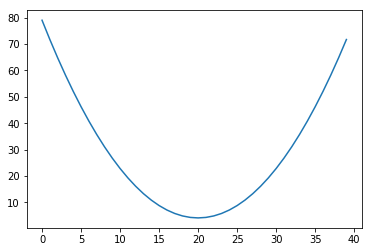

In [76]:
plt.plot(vari)